In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy as sp

In [3]:
Energy = pd.read_excel('ENB2012_data.xlsx')
Energy

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
Column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3':'Wall_Area', 'X4':'Roof_Area','X5':'Overall_Height', 'X6':'Orientation','X7':'Glazing_Area', 'X8':'Glazing_Area_Distribution', 'Y1':'Heating_Load', 'Y2':'Cooling_Load' }
Energy = Energy.rename(columns = Column_names)
Energy

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
#To check the data type
type(Energy)

pandas.core.frame.DataFrame

In [8]:
Energy.keys()

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [12]:
Energy.shape

(768, 10)

In [13]:
Energy.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [14]:
Energy.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [15]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [16]:
#checking for empty values
Energy.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

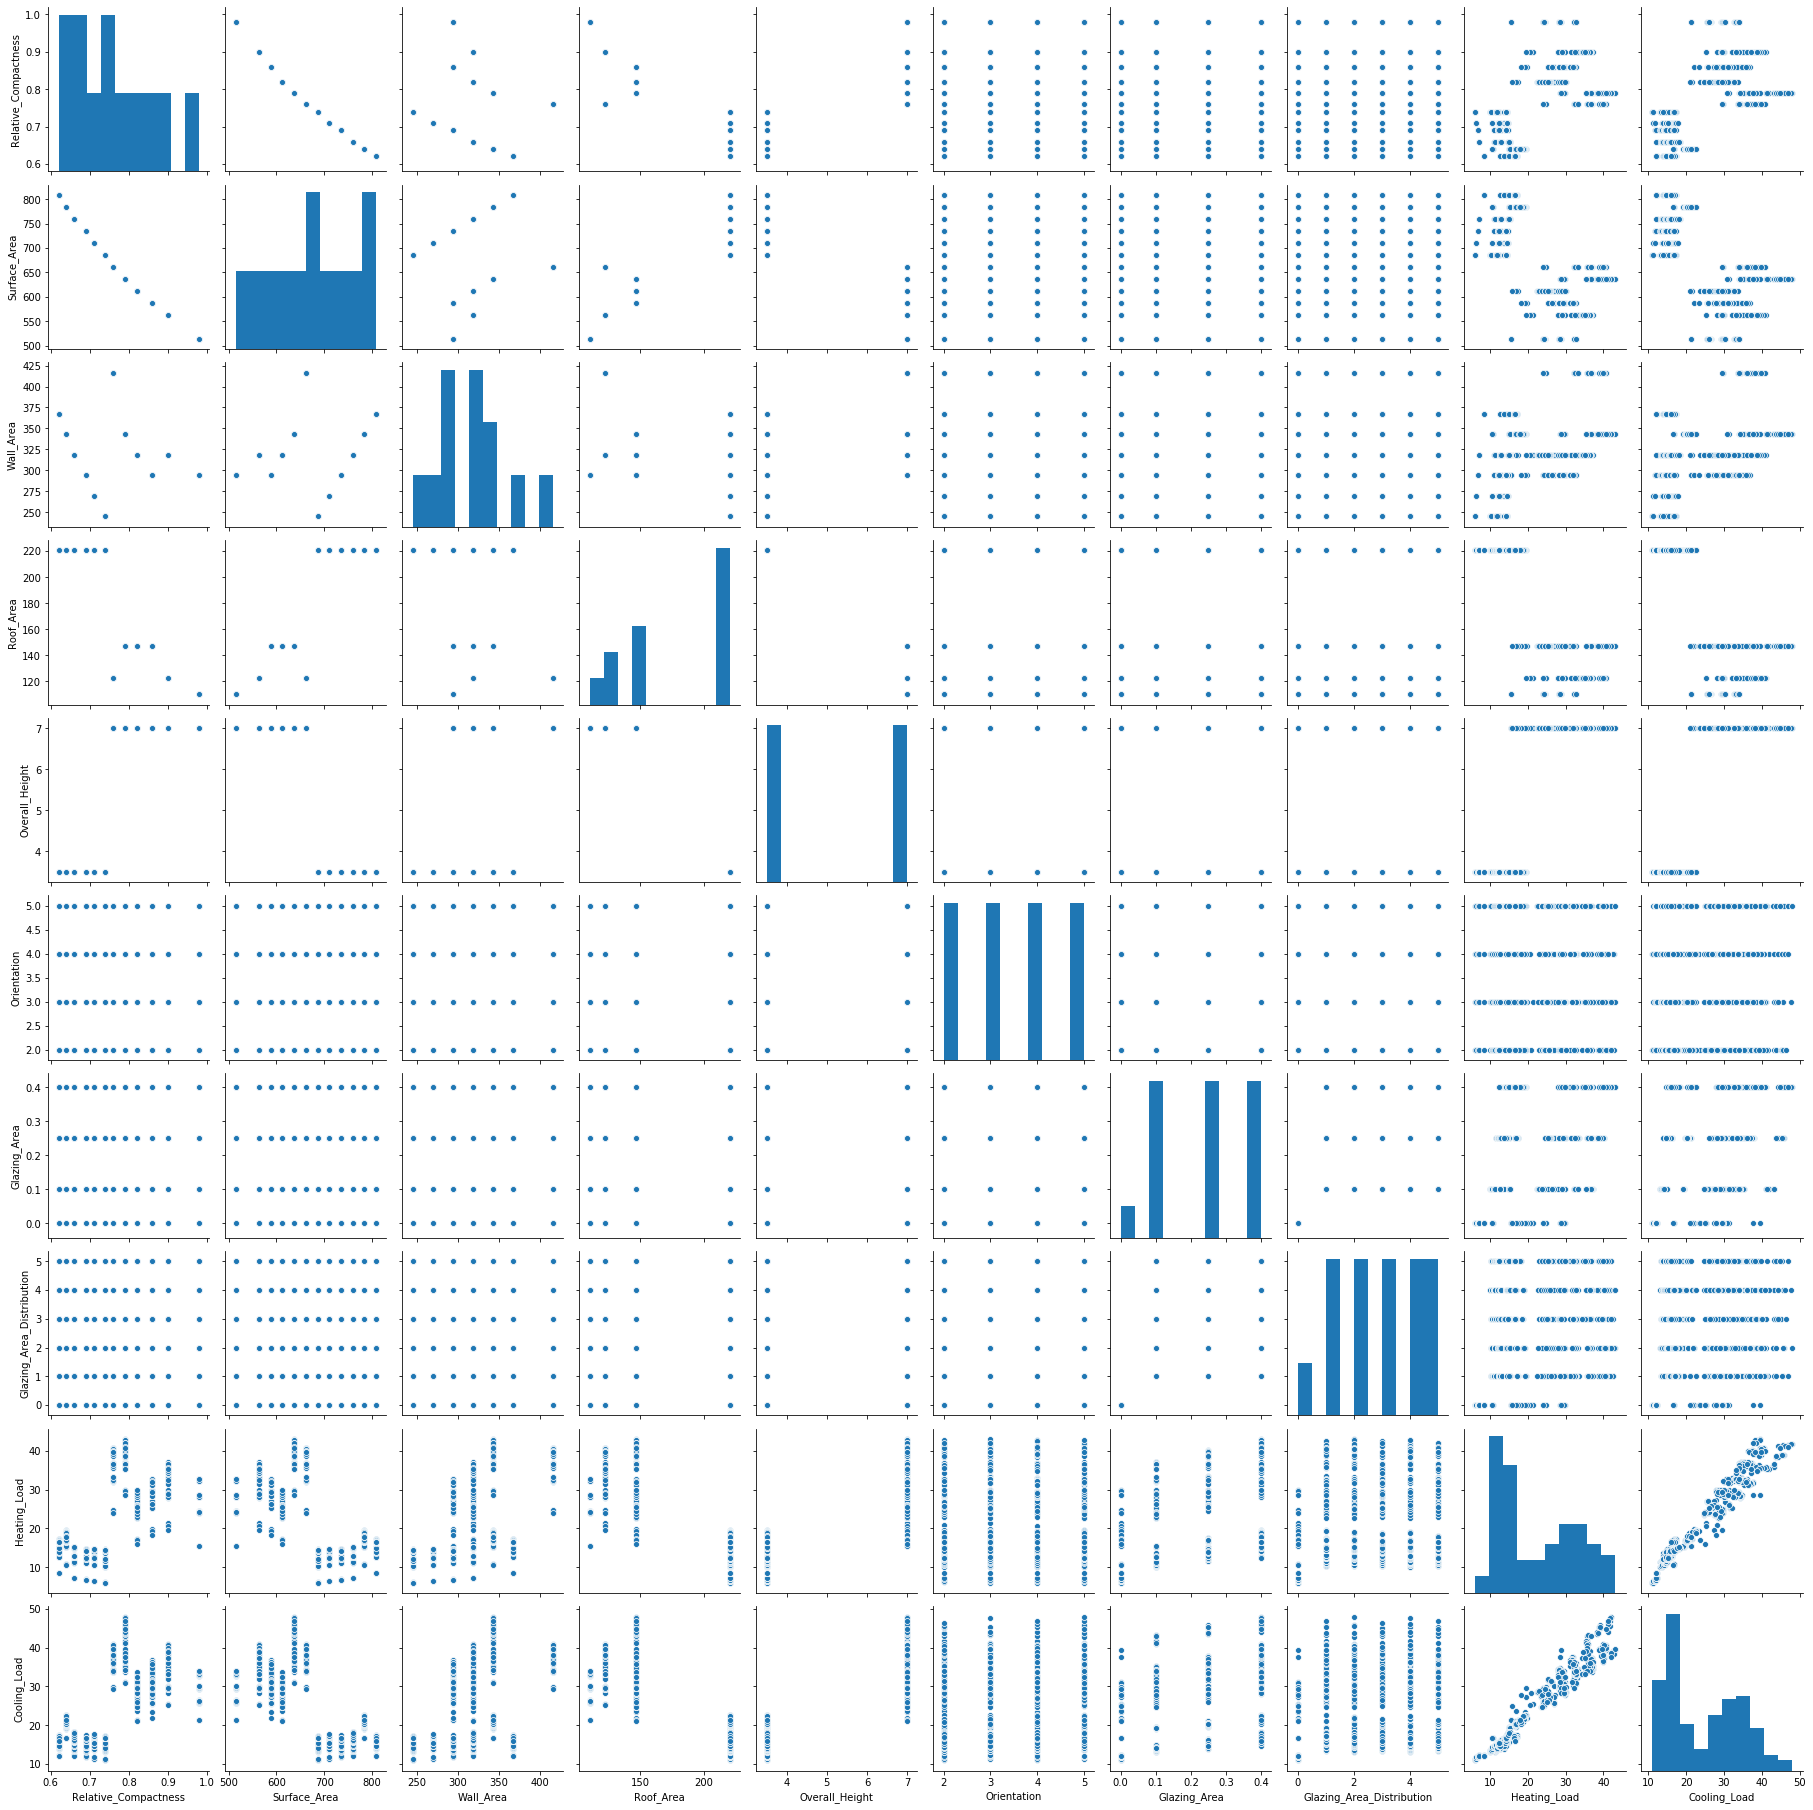

In [17]:
# Data visualization graphically
sns.pairplot(Energy)

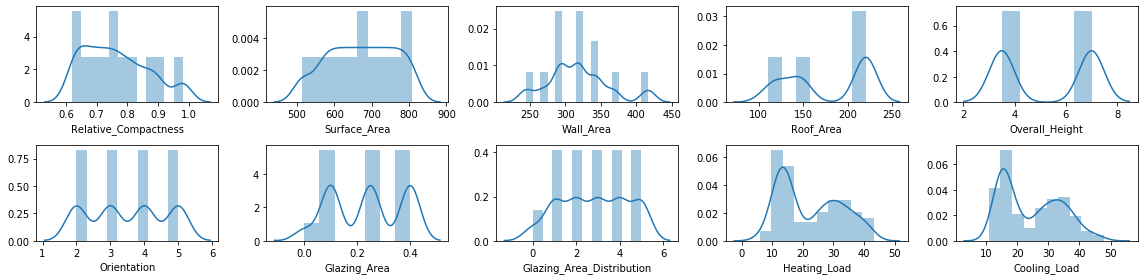

In [24]:
# Distribution plot for the dataset
rows = 2
cols = 5

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = Energy.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(Energy[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

In [25]:
# Correlation matrix to select features
corrmat = Energy.corr()
corrmat

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing_Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


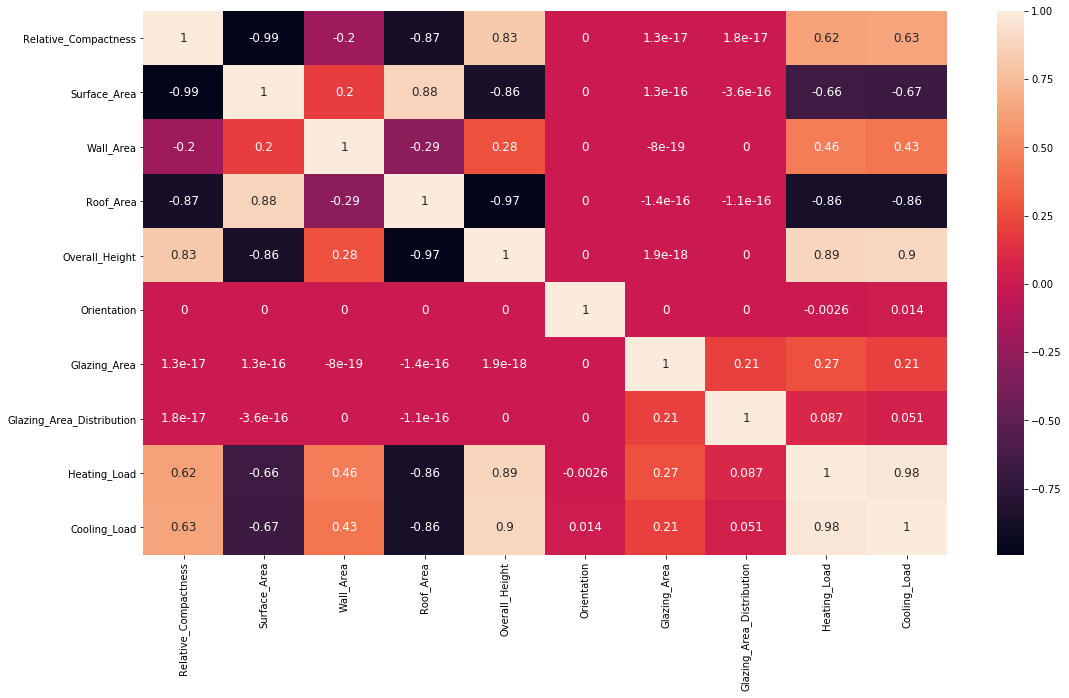

In [33]:
# corelation matrix heat map
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat, annot = True, annot_kws={'size':12})

In [36]:
corrmat.index.values

array(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype=object)

In [40]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns =['corr value'])
    return df

In [45]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Heating_Load'], threshold)
corr_value

,corr value
Relative_Compactness,0.622272
Surface_Area,-0.658120
Roof_Area,-0.861828
Overall_Height,0.889430
Heating_Load,1.000000
Cooling_Load,0.975862


In [43]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Cooling_Load'], threshold)
corr_value

,corr value
Relative_Compactness,0.634339
Surface_Area,-0.672999
Roof_Area,-0.862547
Overall_Height,0.895785
Heating_Load,0.975862
Cooling_Load,1.000000


In [46]:
corr_value.index.values

array(['Relative_Compactness', 'Surface_Area', 'Roof_Area',
       'Overall_Height', 'Heating_Load', 'Cooling_Load'], dtype=object)

In [49]:
correlated_data = Energy[corr_value.index]
correlated_data.head()

,Relative_Compactness,Surface_Area,Roof_Area,Overall_Height,Heating_Load,Cooling_Load
0,0.98,514.5,110.25,7.0,15.55,21.33
1,0.98,514.5,110.25,7.0,15.55,21.33
2,0.98,514.5,110.25,7.0,15.55,21.33
3,0.98,514.5,110.25,7.0,15.55,21.33
4,0.90,563.5,122.50,7.0,20.84,28.28


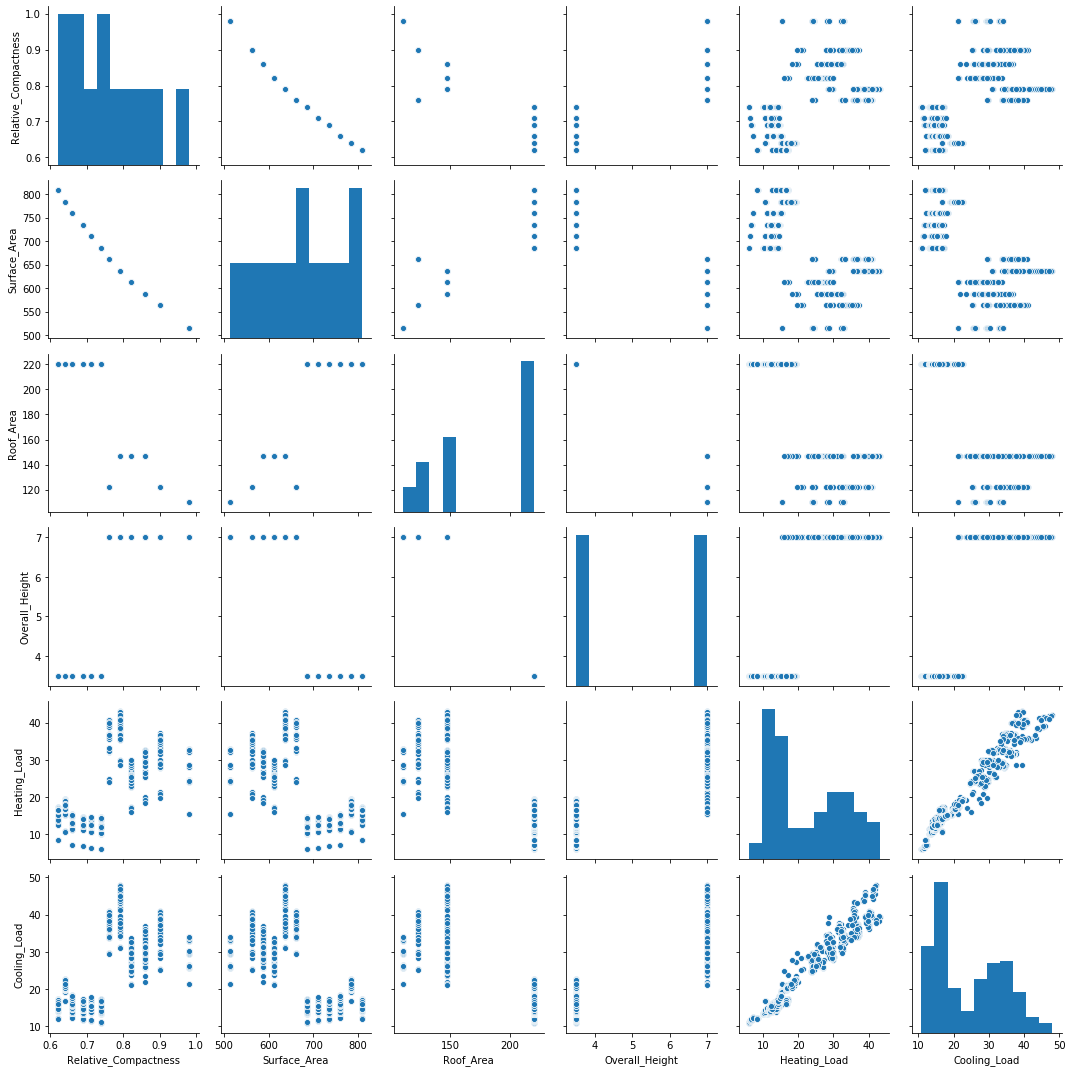

In [51]:
# Pair plot of correlated values
sns.pairplot(correlated_data)
plt.tight_layout()

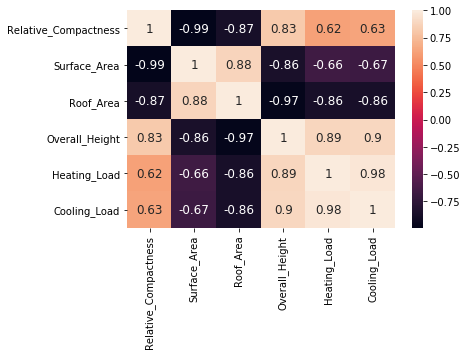

In [52]:
sns.heatmap(correlated_data.corr(), annot = True, annot_kws={'size':12})

In [54]:
X = correlated_data.drop(columns=['Heating_Load', 'Cooling_Load'])
y = correlated_data['Heating_Load']
X.head(10)

,Relative_Compactness,Surface_Area,Roof_Area,Overall_Height
0,0.98,514.5,110.25,7.0
1,0.98,514.5,110.25,7.0
2,0.98,514.5,110.25,7.0
3,0.98,514.5,110.25,7.0
4,0.90,563.5,122.50,7.0
5,0.90,563.5,122.50,7.0
6,0.90,563.5,122.50,7.0
7,0.90,563.5,122.50,7.0
8,0.86,588.0,147.00,7.0
9,0.86,588.0,147.00,7.0


In [60]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
X_train.shape, X_test.shape

((614, 4), (154, 4))

In [62]:
#model fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_predict = model.predict(X_test)
